Advanced Data Understanding:
Perform visual diagnostics like QQ plots to assess normality.
Examine relationships and consolidate datasets (if applicable).
Normalize and transform data for modeling.

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Upload all 9 CSV files (use Shift+Click or Ctrl+Click)
uploaded = files.upload()

Saving BTS2024_MCI.csv to BTS2024_MCI (1).csv
Saving BTS2024_LGA.csv to BTS2024_LGA (1).csv
Saving BTS2024_DEN.csv to BTS2024_DEN (1).csv
Saving BTS2022_MCI.csv to BTS2022_MCI (1).csv
Saving BTS2022_LGA.csv to BTS2022_LGA (1).csv
Saving BTS2022_DEN.csv to BTS2022_DEN (1).csv
Saving BTS2019_MCI.csv to BTS2019_MCI (1).csv
Saving BTS2019_LGA.csv to BTS2019_LGA (1).csv
Saving BTS2019_DEN.csv to BTS2019_DEN (1).csv


In [3]:
# Load Datasets
paths = [
    '/content/BTS2019_DEN.csv', '/content/BTS2019_LGA.csv', '/content/BTS2019_MCI.csv',
    '/content/BTS2022_DEN.csv', '/content/BTS2022_LGA.csv', '/content/BTS2022_MCI.csv',
    '/content/BTS2024_DEN.csv', '/content/BTS2024_LGA.csv', '/content/BTS2024_MCI.csv'
]

datasets = {}
for path in paths:
    year = path.split("BTS")[1][:4]
    airport = path.split("_")[1].split(".")[0]
    df = pd.read_csv(path)
    df['year'] = int(year)
    df['airport'] = airport
    datasets[f"{year}_{airport}"] = df

In [4]:
# Combine Datasets
combined_df = pd.concat(datasets.values(), ignore_index=True)
print("Combined Dataset Shape:", combined_df.shape)
print(combined_df.head())

Combined Dataset Shape: (1428, 21)
   year  month carrier               carrier_name airport  \
0  2019     12      AA  American Airlines Network     DEN   
1  2019     12      AS    Alaska Airlines Network     DEN   
2  2019     12      AX      Trans States Airlines     DEN   
3  2019     12      B6            JetBlue Airways     DEN   
4  2019     12      CP           Compass Airlines     DEN   

                       airport_name  arr_flights  arr_del15  carrier_ct  \
0  Denver, CO: Denver International        862.0      183.0       69.37   
1  Denver, CO: Denver International        164.0       52.0       19.83   
2  Denver, CO: Denver International       2302.0      439.0      107.46   
3  Denver, CO: Denver International         84.0       27.0        9.89   
4  Denver, CO: Denver International         67.0        6.0        0.06   

   weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        1.04  ...         0.81             56.58            1.0   
1        0.

In [5]:
# Overview
print("\nMissing Values:\n", combined_df.isnull().sum())
print("\nDescriptive Statistics:\n", combined_df.describe())


Missing Values:
 year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            1
arr_del15              1
carrier_ct             1
weather_ct             1
nas_ct                 1
security_ct            1
late_aircraft_ct       1
arr_cancelled          1
arr_diverted           1
arr_delay              1
carrier_delay          1
weather_delay          1
nas_delay              1
security_delay         1
late_aircraft_delay    1
dtype: int64

Descriptive Statistics:
               year        month  arr_flights    arr_del15   carrier_ct  \
count  1428.000000  1428.000000  1427.000000  1427.000000  1427.000000   
mean   2021.336835     6.503501   874.207428   192.718991    50.722803   
std       2.073117     3.438414  1401.453258   292.381039    90.502562   
min    2019.000000     1.000000     1.000000     0.000000     0.000000   
25%    2019.000000     4.000000    85.500000    

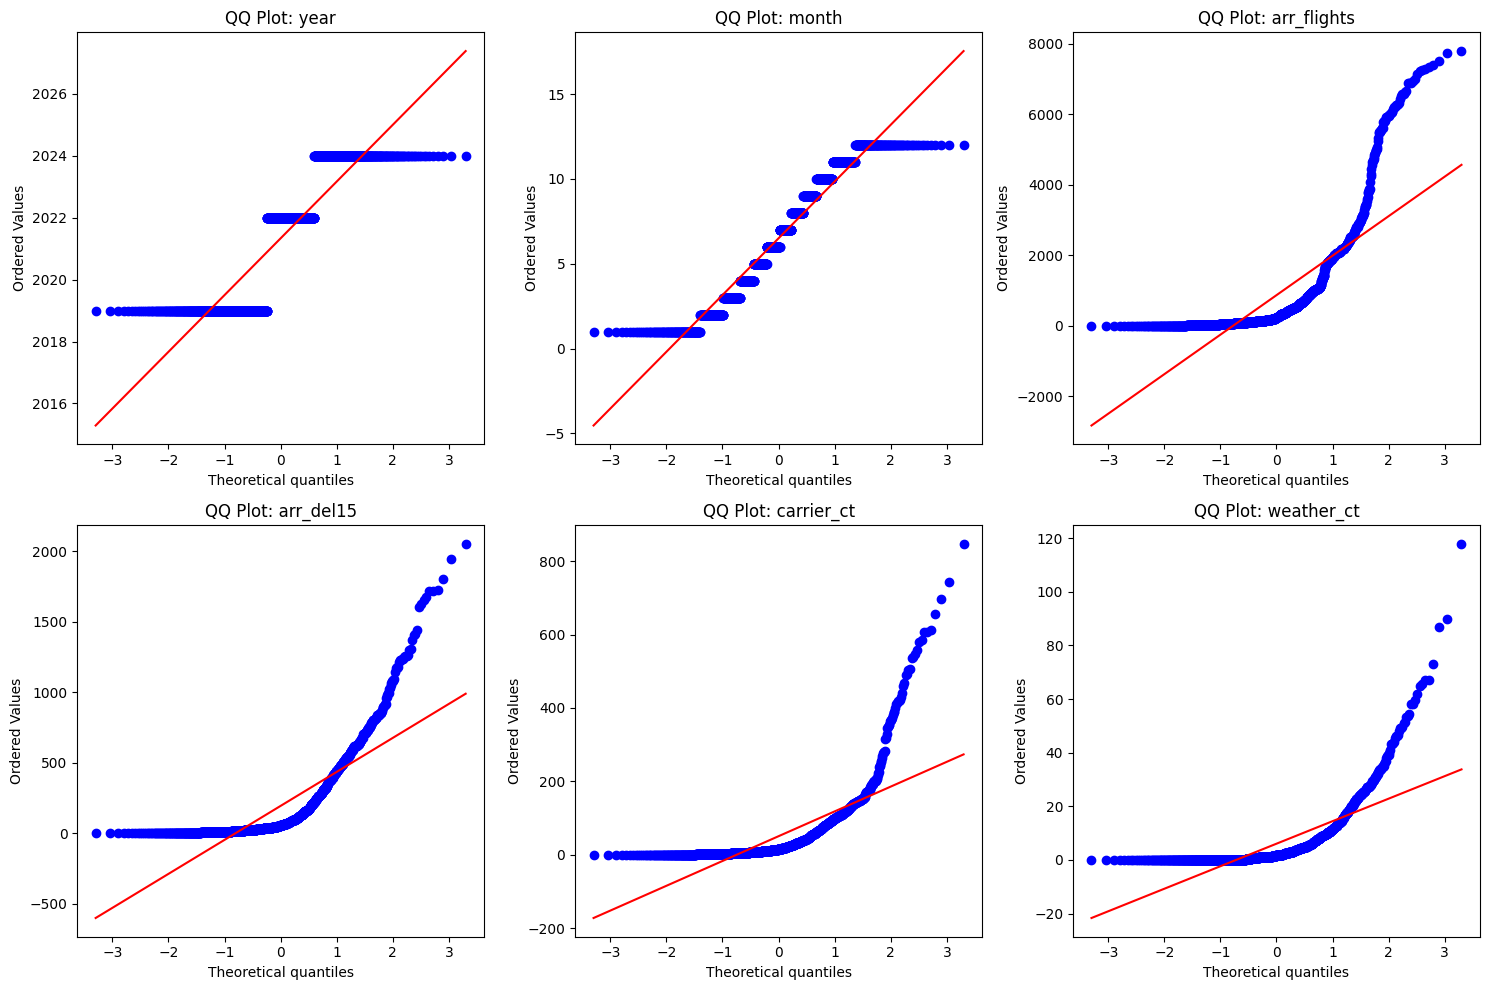

In [6]:
# QQ Plot for Normality Diagnostics - Select numeric columns for QQ plots
numeric_cols = combined_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(2, 3, i)
    stats.probplot(combined_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot: {col}")
plt.tight_layout()
plt.show()

The QQ plots indicate that most numerical variables deviate substantially from the red reference line, confirming that they do not follow a normal distribution. Temporal features such as year and month are discrete and therefore not expected to display normality. However, continuous operational metrics such as arr_flights, arr_del15, carrier_ct, and weather_ct all exhibit pronounced right skew, where data points rise sharply above the theoretical quantile line in the upper tail. This skewness suggests that a small number of months experience extremely high values compared to the majority of observations. Because normality assumptions underpin many modeling techniques, transformations such as logarithmic or Box-Cox may be appropriate to stabilize variance and approximate normality for these variables before further analysis or predictive modeling.

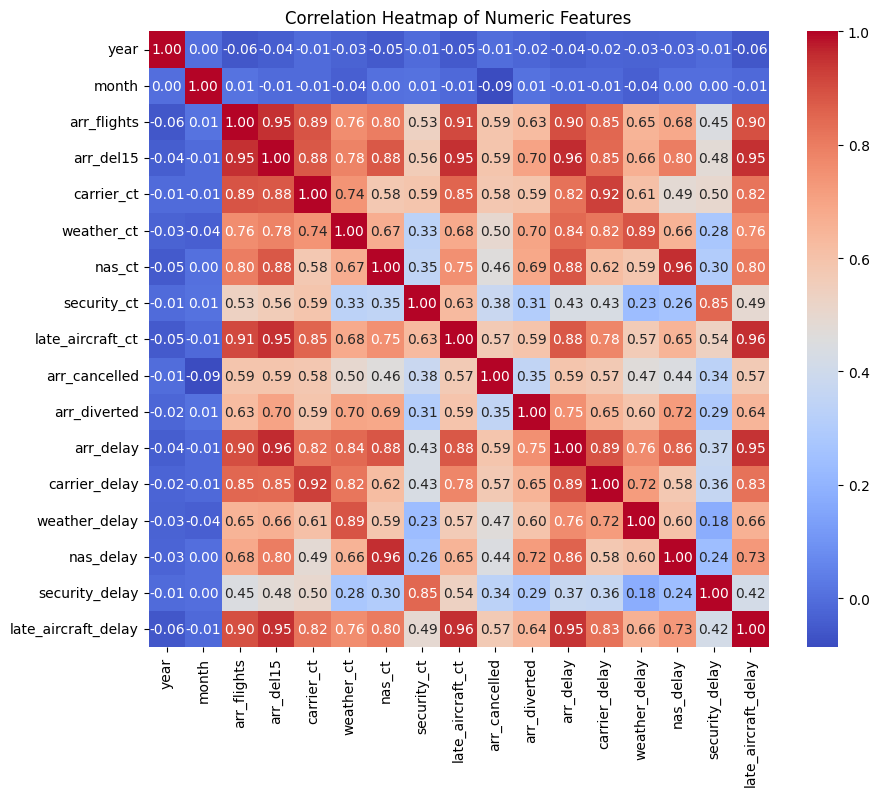

In [7]:
# Correlation Matrix & Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The correlation heatmap highlights several strong relationships between variables, revealing important patterns and potential redundancy. Variables such as arr_delay, arr_del15, and arr_flights are highly correlated (r ≈ 0.95), indicating that higher flight volumes are strongly associated with greater total delay minutes and more delayed flights. Similarly, late_aircraft_ct and late_aircraft_delay show an almost perfect correlation (r ≈ 0.96), reflecting that these two measures represent different views of the same operational factor. Carrier_ct and carrier_delay are also tightly linked (r ≈ 0.92), reinforcing that delay count and delay minutes tend to move together. Weather-related variables, including weather_ct and weather_delay, display moderate correlations around 0.65 to 0.75 with total delay metrics, indicating that weather contributes meaningfully but inconsistently to delays across months and airports. In contrast, security-related variables are weakly correlated with all others, suggesting that security delays occur independently of broader operational trends. These high correlations point to potential multicollinearity that could distort regression or clustering result. Thus, redundant variables should be consolidated or addressed using dimensionality reduction techniques like PCA.

In [8]:
# Data Normalization & Transformation- Standard Scaling (Z-score normalization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

In [9]:
print("\nScaled Data Sample:")
print(scaled_df.head())


Scaled Data Sample:
       year     month  arr_flights  arr_del15  carrier_ct  weather_ct  \
0 -1.127603  1.599116    -0.008714  -0.033252    0.206113   -0.456806   
1 -1.127603  1.599116    -0.506943  -0.481455   -0.341467   -0.544286   
2 -1.127603  1.599116     1.019151   0.842624    0.627132    1.910618   
3 -1.127603  1.599116    -0.564046  -0.566990   -0.451337   -0.491434   
4 -1.127603  1.599116    -0.576181  -0.638839   -0.559990   -0.551576   

     nas_ct  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  \
0 -0.170790     0.639530         -0.032477      -0.366336     -0.427384   
1 -0.469513    -0.351559         -0.458128      -0.351214     -0.427384   
2  0.455497    -0.351559          1.109987       0.268799      0.181033   
3 -0.548308    -0.351559         -0.518073      -0.381458     -0.427384   
4 -0.600422    -0.351559         -0.559334      -0.381458     -0.427384   

   arr_delay  carrier_delay  weather_delay  nas_delay  security_delay  \
0  -0.141913    

After applying Z-score normalization, all numeric variables were rescaled to have a mean of zero and a standard deviation of one. This ensures that large-scale variables, such as arr_flights (ranging in the thousands), and smaller-scale variables, such as security_ct (often single digits), contribute equally in modeling and clustering analyses. Normalization is particularly crucial for algorithms sensitive to feature magnitude, such as K-means or PCA, which assume all variables are on comparable scales. The resulting scaled dataset maintains the original structure and relationships among features while improving the stability and interpretability.

In [10]:
# Save Processed Data
scaled_df.to_csv("/content/BTS_combined_scaled.csv", index=False)
print("Combined and scaled dataset saved as BTS_combined_scaled.csv")

Combined and scaled dataset saved as BTS_combined_scaled.csv
